<a href="https://colab.research.google.com/github/asadali163/Time-Series-Experiments/blob/main/codebase/ARIMA_(Econometrics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O econometrics.xlsx https://lazyprogrammer.me/course_files/timeseries/us_macro_quarterly.xlsx

--2024-07-14 09:59:42--  https://lazyprogrammer.me/course_files/timeseries/us_macro_quarterly.xlsx
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76805 (75K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘econometrics.xlsx’

econometrics.xlsx   100%[===================>]  75.00K  --.-KB/s    in 0.02s   

2024-07-14 09:59:42 (3.47 MB/s) - ‘econometrics.xlsx’ saved [76805/76805]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel('econometrics.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,GDPC96,JAPAN_IP,PCECTPI,GS10,GS1,TB3MS,UNRATE,EXUSUK,CPIAUCSL
0,1957:01,2851.778,8.414363,16.449,3.403333,3.390000,3.096667,3.933333,NaN,27.776667
1,1957:02,2845.453,9.097347,16.553,3.626667,3.540000,3.140000,4.100000,NaN,28.013333
2,1957:03,2873.169,9.042708,16.687,3.926667,3.963333,3.353333,4.233333,NaN,28.263333
3,1957:04,2843.718,8.796834,16.773,3.633333,3.586667,3.310000,4.933333,NaN,28.400000
4,1958:01,2770.000,8.632918,16.978,3.040000,2.160000,1.756667,6.300000,NaN,28.736667


In [ ]:
df.shape

(228, 10)

In [ ]:
def parse_date(row):
  year, quarter = row.split(':')
  month = (int(quarter) - 1 ) * 3 + 1
  return datetime.strptime(f'{year}-{month}', '%Y-%m')


In [ ]:
df['Date'] = df['Unnamed: 0'].apply(parse_date)

In [ ]:
df.head()

,Unnamed: 0,GDPC96,JAPAN_IP,PCECTPI,GS10,GS1,TB3MS,UNRATE,EXUSUK,CPIAUCSL,Date
0,1957:01,2851.778,8.414363,16.449,3.403333,3.390000,3.096667,3.933333,NaN,27.776667,1957-01-01
1,1957:02,2845.453,9.097347,16.553,3.626667,3.540000,3.140000,4.100000,NaN,28.013333,1957-04-01
2,1957:03,2873.169,9.042708,16.687,3.926667,3.963333,3.353333,4.233333,NaN,28.263333,1957-07-01
3,1957:04,2843.718,8.796834,16.773,3.633333,3.586667,3.310000,4.933333,NaN,28.400000,1957-10-01
4,1958:01,2770.000,8.632918,16.978,3.040000,2.160000,1.756667,6.300000,NaN,28.736667,1958-01-01


In [ ]:
df.set_index('Date', inplace=True)
df.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
df.index.freq = 'QS'

In [ ]:
df.head()

,GDPC96,JAPAN_IP,PCECTPI,GS10,GS1,TB3MS,UNRATE,EXUSUK,CPIAUCSL
Date,,,,,,,,,
1957-01-01,2851.778,8.414363,16.449,3.403333,3.390000,3.096667,3.933333,NaN,27.776667
1957-04-01,2845.453,9.097347,16.553,3.626667,3.540000,3.140000,4.100000,NaN,28.013333
1957-07-01,2873.169,9.042708,16.687,3.926667,3.963333,3.353333,4.233333,NaN,28.263333
1957-10-01,2843.718,8.796834,16.773,3.633333,3.586667,3.310000,4.933333,NaN,28.400000
1958-01-01,2770.000,8.632918,16.978,3.040000,2.160000,1.756667,6.300000,NaN,28.736667


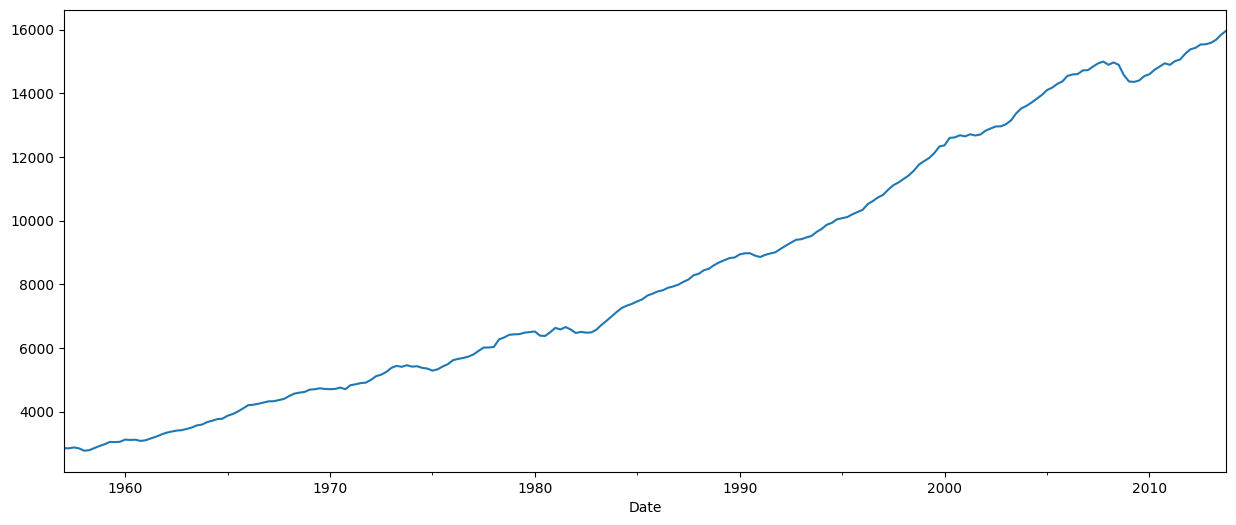

In [ ]:
df['GDPC96'].plot(figsize=(15,6));

As we can see there is clear upward trend, so we need to make it stationary

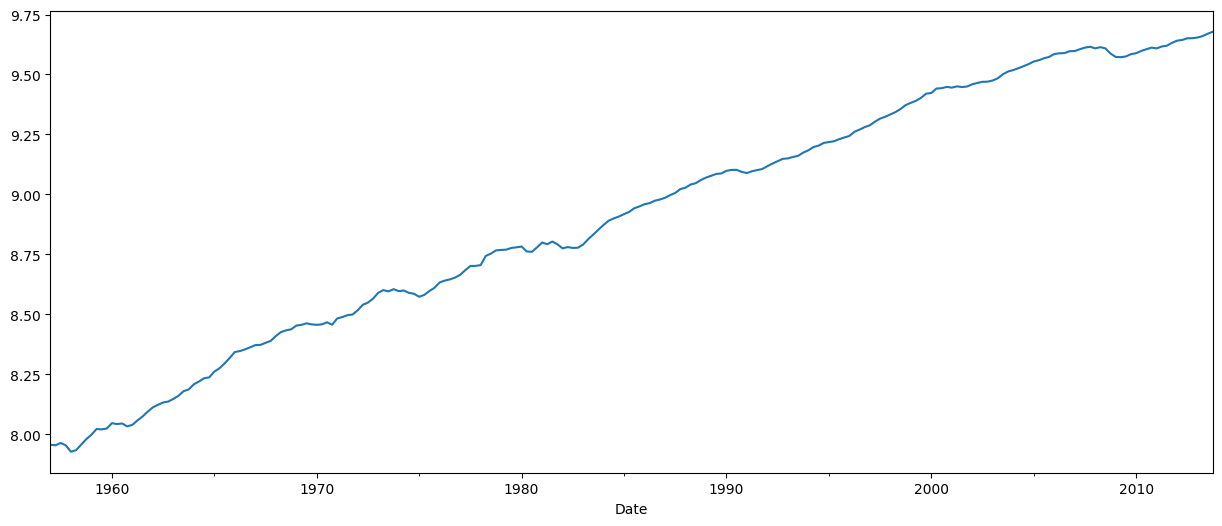

In [ ]:
np.log(df['GDPC96']).plot(figsize=(15,6));

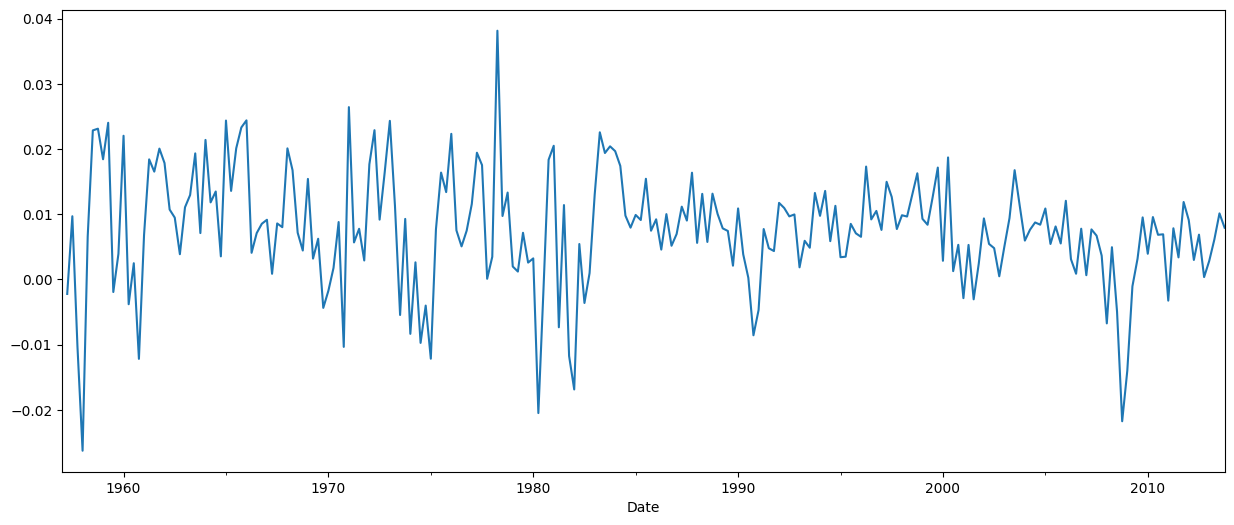

In [ ]:
np.log(df['GDPC96']).diff().plot(figsize=(15,6));

Now we can see that it is almost stationary

In [ ]:
df['GDPGrowth'] = np.log(df['GDPC96']).diff()

In [ ]:
df.head()

,GDPC96,JAPAN_IP,PCECTPI,GS10,GS1,TB3MS,UNRATE,EXUSUK,CPIAUCSL,GDPGrowth
Date,,,,,,,,,,
1957-01-01,2851.778,8.414363,16.449,3.403333,3.390000,3.096667,3.933333,NaN,27.776667,NaN
1957-04-01,2845.453,9.097347,16.553,3.626667,3.540000,3.140000,4.100000,NaN,28.013333,-0.002220
1957-07-01,2873.169,9.042708,16.687,3.926667,3.963333,3.353333,4.233333,NaN,28.263333,0.009693
1957-10-01,2843.718,8.796834,16.773,3.633333,3.586667,3.310000,4.933333,NaN,28.400000,-0.010303
1958-01-01,2770.000,8.632918,16.978,3.040000,2.160000,1.756667,6.300000,NaN,28.736667,-0.026265


In [ ]:
df['TSpread'] = df['GS10'] - df['TB3MS']

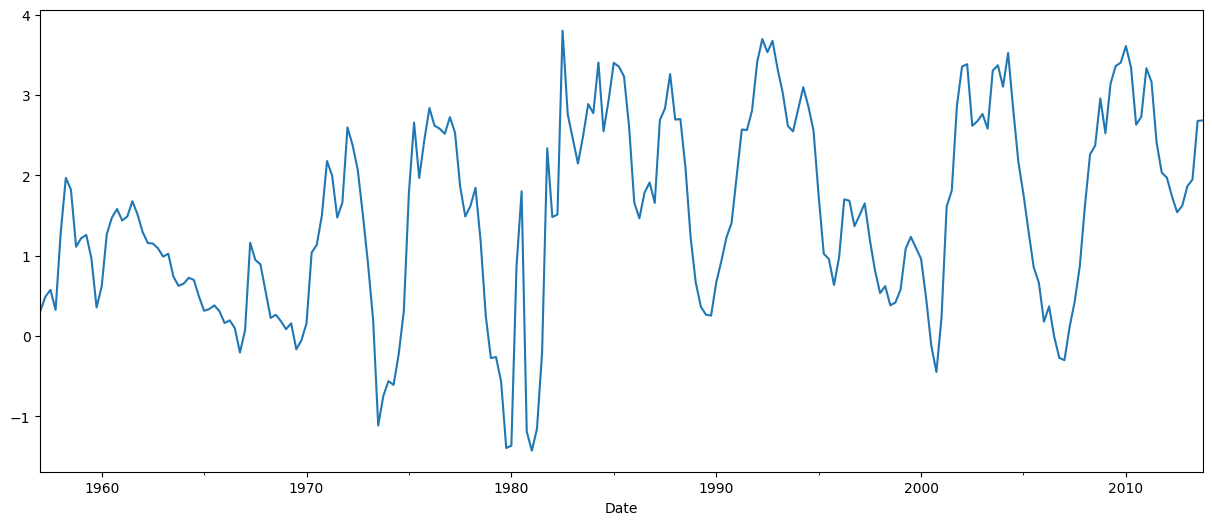

In [ ]:
df['TSpread'].plot(figsize=(15,6));

This is also almost stationary, a weak trend is also shown here

In [ ]:
cols = ['GDPGrowth', 'TSpread']

### Now we will work on these data

In [ ]:
df1 = df[cols][1:].copy()

In [ ]:
df1.head()

,GDPGrowth,TSpread
Date,,
1957-04-01,-0.002220,0.486667
1957-07-01,0.009693,0.573333
1957-10-01,-0.010303,0.323333
1958-01-01,-0.026265,1.283333
1958-04-01,0.006577,1.966667


Let's have some analysis to choose model parameters

In [ ]:
N_test = 12
train = df1[:-N_test]
test = df1[-N_test:]

In [ ]:
train_idx = df1.index <= train.index[-1]
test_idx = df1.index > train.index[-1]

In [ ]:
scalar = StandardScaler()
train[cols] = scalar.fit_transform(train)
test[cols] = scalar.transform(test)

<ipython-input-23-fbcdcb5fe481>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[cols] = scalar.fit_transform(train)
<ipython-input-23-fbcdcb5fe481>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[cols] = scalar.transform(test)


In [ ]:
df1.iloc[train_idx, :] = train
df1.iloc[test_idx, :] = test

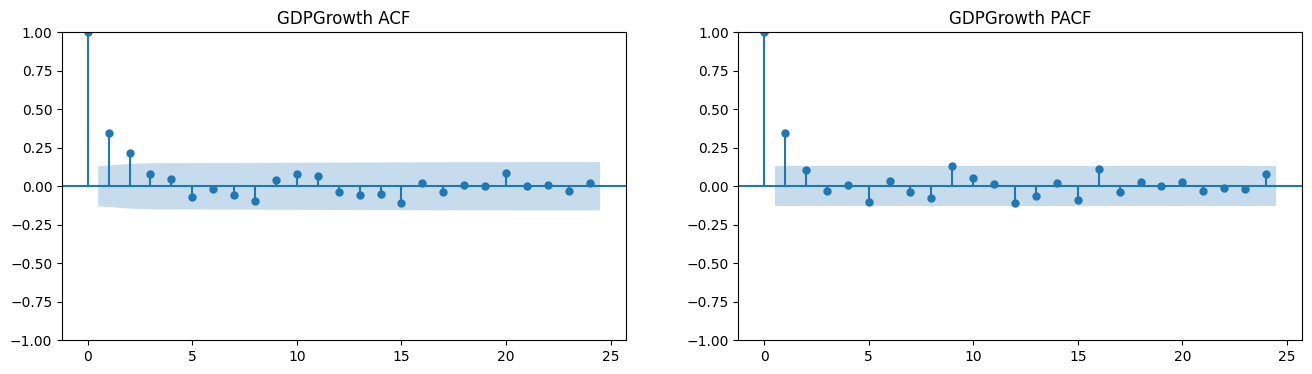

In [ ]:
# Plot acf and pacf plots
fig, axes = plt.subplots(1, 2, figsize=(16,4))
plot_acf(df1['GDPGrowth'], ax=axes[0])
plot_pacf(df1['GDPGrowth'], ax=axes[1])
axes[0].set_title('GDPGrowth ACF')
axes[1].set_title('GDPGrowth PACF');

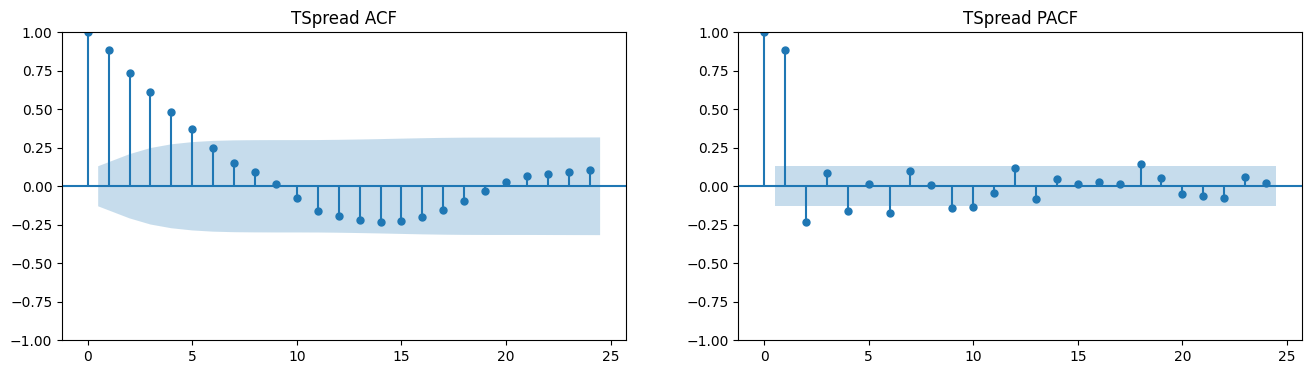

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
plot_acf(df1['TSpread'], ax=axes[0])
plot_pacf(df1['TSpread'], ax=axes[1])
axes[0].set_title('TSpread ACF')
axes[1].set_title('TSpread PACF');

As we can see that there is a trend in TSpread values. <br>
We can't choose these values as final one because there should be cross dependencies in VARMA models. <br>
The best thing is to do grid search and choose the best model on the basis of your information critirion.

In [ ]:
def adf_test(series):
  result = adfuller(series)
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  if (result[1] <= 0.05):
    print('Stationary')
  else:
    print('Non-Stationary')

In [ ]:
adf_test(df1['GDPGrowth'])

ADF Statistic: -7.652127781838674
p-value: 1.7778242215604493e-11
Stationary


In [ ]:
adf_test(df1['TSpread'])

ADF Statistic: -4.664349324968893
p-value: 9.813333048207929e-05
Stationary


As both series are stationary, so we can proceed further

In [ ]:
p = 18
q = 1

In [ ]:
t0 = datetime.now()
model = VARMAX(train[cols], order=(p,q))
res = model.fit(maxiter=100)
print(datetime.now() - t0)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0:01:28.054668


In [ ]:
fcast = res.get_forecast(steps=N_test)

In [ ]:
res.fittedvalues

,GDPGrowth,TSpread
Date,,
1957-04-01,-0.005541,0.042342
1957-07-01,-0.498882,-0.602278
1957-10-01,-0.212046,-0.566618
1958-01-01,-0.621748,-0.744904
1958-04-01,-1.636169,0.500183
...,...,...
2009-10-01,0.199840,1.481060
2010-01-01,0.748225,1.987631
2010-04-01,0.157307,2.192159


In [ ]:
fcast.predicted_mean

,GDPGrowth,TSpread
2011-01-01,-0.325678,0.954063
2011-04-01,-0.456332,1.174547
2011-07-01,-1.079144,1.167802
2011-10-01,-0.134408,1.115941
2012-01-01,-0.058697,0.716218
2012-04-01,-0.069151,0.404232
2012-07-01,-0.075965,0.377353
2012-10-01,-0.329383,0.204523
2013-01-01,-0.379092,-0.089537
2013-04-01,-0.267177,0.060903


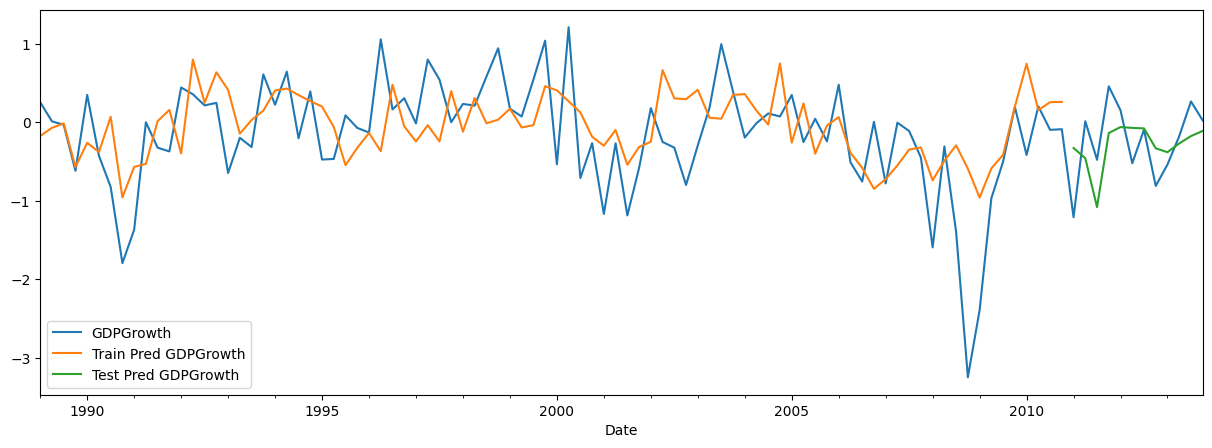

In [ ]:
df1.loc[train_idx, 'Train Pred GDPGrowth'] = res.fittedvalues['GDPGrowth']
df1.loc[test_idx, 'Test Pred GDPGrowth'] = fcast.predicted_mean['GDPGrowth']
df1[['GDPGrowth', 'Train Pred GDPGrowth', 'Test Pred GDPGrowth']][-100:].plot(figsize=(15,5));

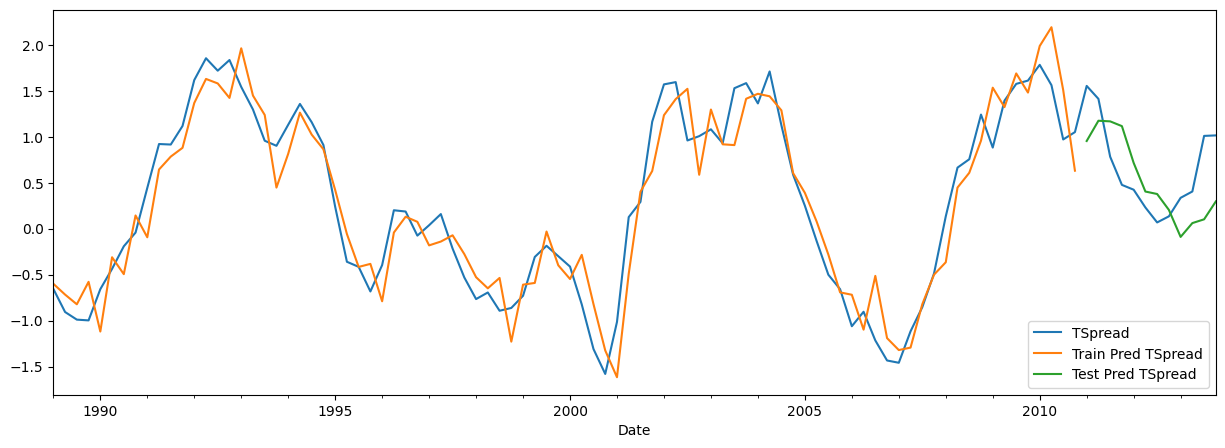

In [ ]:
df1.loc[train_idx, 'Train Pred TSpread'] = res.fittedvalues['TSpread']
df1.loc[test_idx, 'Test Pred TSpread'] = fcast.predicted_mean['TSpread']
df1[['TSpread', 'Train Pred TSpread', 'Test Pred TSpread']][-100:].plot(figsize=(15,5));

As we can see somewhat of trend following but with noise, the prediction is not accurate. Even the peak is non predictable in GDP Growth

In [ ]:
# Let's find the r2 score of both.
gdp_train_r2 = r2_score(train['GDPGrowth'], df1.loc[train_idx, 'Train Pred GDPGrowth'])
gdp_test_r2 = r2_score(test['GDPGrowth'], df1.loc[test_idx, 'Test Pred GDPGrowth'])
print(f'Train R2: {gdp_train_r2}')
print(f'Test R2: {gdp_test_r2}')

Train R2: 0.2765026838511855
Test R2: 0.04127863387927777


In [ ]:
# R2 for tspread.
tspread_train_r2 = r2_score(train['TSpread'], df1.loc[train_idx, 'Train Pred TSpread'])
tspread_test_r2 = r2_score(test['TSpread'], df1.loc[test_idx, 'Test Pred TSpread'])
print(f'Train R2: {tspread_train_r2}')
print(f'Test R2: {tspread_test_r2}')

Train R2: 0.8736899787450714
Test R2: -0.04794544933313749


As we can the that the R2 score for train data is good in case of tspread. But the test r2 score is even in negative.

## Let's work with VAR with same data

In [ ]:
var_model = VAR(train[cols])

In [ ]:
lag_order_results = var_model.select_order(maxlags=15)
lag_order_results.selected_orders

{'aic': 10, 'bic': 1, 'hqic': 2, 'fpe': 10}

So we have to choose the lag order of 10, if we select the aic information critirion

In [ ]:
res = var_model.fit(maxlags=20, ic='aic')

In [ ]:
lag_order = res.k_ar
lag_order

10

In [ ]:
prior = train.iloc[-lag_order:].to_numpy()
fcast = res.forecast(y=prior, steps=N_test)

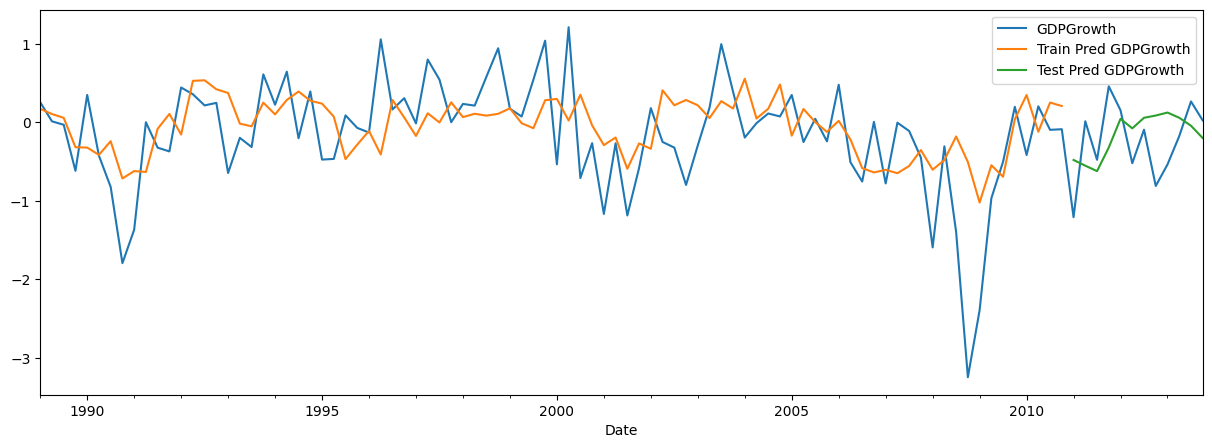

In [ ]:
# Let's plot the same plots again with VAR Prediction
df1.loc[train_idx, 'Train Pred GDPGrowth'] = res.fittedvalues['GDPGrowth']
df1.loc[test_idx, 'Test Pred GDPGrowth'] = fcast[:, 0]
df1[['GDPGrowth', 'Train Pred GDPGrowth', 'Test Pred GDPGrowth']][-100:].plot(figsize=(15,5));

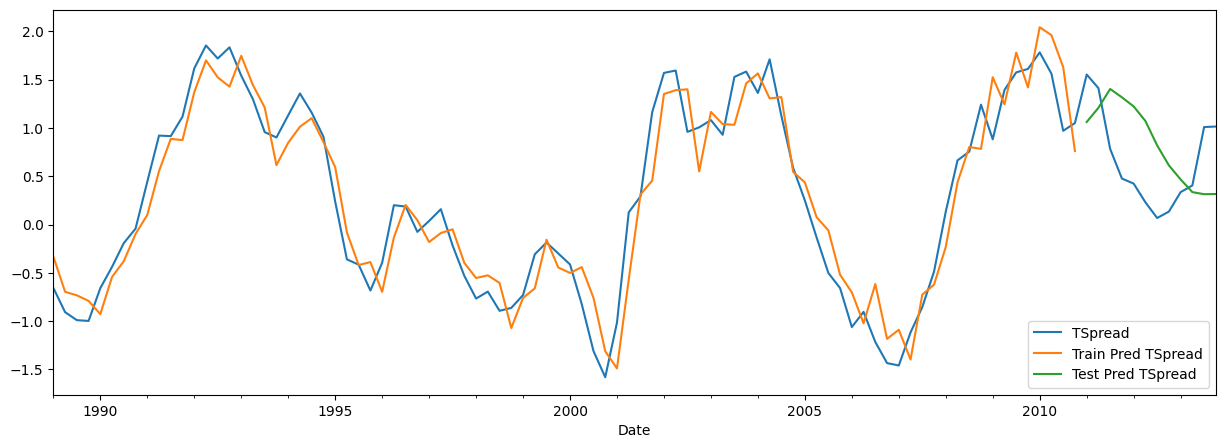

In [ ]:
# For Tspread
df1.loc[train_idx, 'Train Pred TSpread'] = res.fittedvalues['TSpread']
df1.loc[test_idx, 'Test Pred TSpread'] = fcast[:, 1]
df1[['TSpread', 'Train Pred TSpread', 'Test Pred TSpread']][-100:].plot(figsize=(15,5));


Again we see the same behaviour, but the prediction on test is even worse then the VARMA.

In [ ]:
# R2 score
# df1.loc[train_idx, 'Train Pred GDPGrowth']
gdp_train_r2 = r2_score(train['GDPGrowth'][10:], df1.loc[train_idx, 'Train Pred GDPGrowth'][10:])
gdp_test_r2 = r2_score(test['GDPGrowth'], df1.loc[test_idx, 'Test Pred GDPGrowth'])
print(f'Train R2: {gdp_train_r2}')
print(f'Test R2: {gdp_test_r2}')

Train R2: 0.2569812409739456
Test R2: -0.23961760567261048


In [ ]:
tspread_train_r2 = r2_score(train['TSpread'][10:], df1.loc[train_idx, 'Train Pred TSpread'][10:])
tspread_test_r2 = r2_score(test['TSpread'], df1.loc[test_idx, 'Test Pred TSpread'])
print(f'Train R2: {tspread_train_r2}')
print(f'Test R2: {tspread_test_r2}')

Train R2: 0.8581031996649263
Test R2: -0.671732865971082


As we can see that the test predictions is even worse in this case